In [48]:
import pandas as pd
import numpy as np
from fbprophet import Prophet


In [49]:
import requests

POLONIEX_OHLCV_BASEURL = 'https://poloniex.com/public?command=returnChartData&currencyPair='

"""
https://poloniex.com/public?command=returnChartData&currencyPair=BTC_POT&start=1435699200&end=9999999999&period=14400

"""

def get_ohlcv_poloniex(pair='BTC_ETH', start=1435699200, end=9999999999, period=900):
    """
    returns ohlcv data for poloniex as pandas dataframe
    convert to unix timestamp using https://coderstoolbox.net/unixtimestamp/
    :param pair: str pair on poloniex
    :param start: int unix timestamp of beginning time
    :param end: int unix timestamp of ending time
    :param period: int candle width in seconds
    :return: pandas df of ohlcv data from poloniex for specified pair, times, and period
    """
    query = POLONIEX_OHLCV_BASEURL + pair + '&start=' + str(start) + '&end=' + str(end) + '&period=' + str(period)
    resp = requests.get(query)

    if resp.status_code != 200:
        raise requests.ApiError('GET /tasks/ {}'.format(resp.status_code))

    return pd.DataFrame(resp.json())

In [50]:
df = get_ohlcv_poloniex(pair='USDT_BTC', start=1483600958, end=9999999999, period=900)
#no option to pass in 3600 sec candles
df = df[df.index % 4 == 0]
df['ds'] = pd.to_datetime(df['date'], unit='s')
df['y'] = df['weightedAverage']
df['logWeightedAverage'] = df['weightedAverage'].apply(np.log)


In [51]:
df

close        date         high          low         open  \
0      1143.999999  1483601400  1145.000000  1135.000000  1137.020000   
4      1136.000000  1483605000  1136.000000  1124.018000  1124.500000   
8      1092.000000  1483608600  1099.232465  1055.291200  1085.000000   
12     1086.000000  1483612200  1111.000000  1085.000000  1096.000000   
16     1099.593509  1483615800  1100.000000  1087.000000  1087.000000   
20     1025.000000  1483619400  1073.460000  1022.300000  1070.238834   
24      940.000000  1483623000   990.000000   935.000000   973.000000   
28      952.890000  1483626600   968.000000   949.990000   953.000000   
32      993.337000  1483630200   993.337000   972.010001   983.337000   
36      953.360966  1483633800   973.060000   940.338000   973.060000   
40      962.022148  1483637400   966.989999   950.000000   957.500798   
44      975.254010  1483641000   977.911173   971.770005   977.911173   
48      958.000580  1483644600   963.700000   953.000000   953.941114   
52      967.064786  1483648200   977.999990   958.787000   959.000000   
56      962.990000  1483651800   968.044188   956.107403   964.199999   
60      994.990000  1483655400   995.000000   984.980000   988.000000   
64      999.990000  1483659000  1000.705769   983.965627   989.000000   
68     1004.720121  1483662600  1007.568871  1001.010000  1002.623156   
72     1018.345597  1483666200  1018.345597  1012.144670  1017.000000   
76      977.006843  1483669800   998.011000   965.231503   989.300000   
80      980.000000  1483673400   980.000000   960.767162   961.737928   
84      974.790000  1483677000   975.390000   970.000000   972.748443   
88      984.990000  1483680600   985.010000   971.000000   971.000000   
92      975.899989  1483684200   979.945756   973.592219   978.000000   
96      963.048871  1483687800   975.000000   937.913000   943.000000   
100     944.100000  1483691400   951.681970   942.100000   950.000000   
104     919.000000  1483695000   939.675789   919.000000   938.000000   
108     937.800000  1483698600   940.000000   921.562999   927.081990   
112     881.000000  1483702200   898.661374   870.000000   896.490144   
116     889.000000  1483705800   890.100000   878.000001   879.000000   
...            ...         ...          ...          ...          ...   
58400  6990.089350  1536161400  7006.710070  6987.553302  6995.437000   
58404  6969.628951  1536165000  6993.803723  6969.033552  6978.666766   
58408  6920.280854  1536168600  6930.200000  6901.759474  6905.439040   
58412  6915.000000  1536172200  6919.966447  6898.100000  6910.492570   
58416  6923.688835  1536175800  6925.408044  6903.902269  6904.977599   
58420  6937.000000  1536179400  6949.949400  6930.752477  6949.949400   
58424  6938.000000  1536183000  6953.473040  6918.138225  6953.473040   
58428  6900.000000  1536186600  6919.849379  6895.202363  6906.258119   
58432  6820.268068  1536190200  6902.868603  6820.000000  6895.500000   
58436  6398.791713  1536193800  6414.184264  6305.000000  6360.194718   
58440  6432.127981  1536197400  6434.995358  6412.570550  6417.779220   
58444  6463.652013  1536201000  6483.370494  6459.000000  6470.348610   
58448  6427.002304  1536204600  6447.070742  6421.440801  6421.440801   
58452  6441.000000  1536208200  6467.500000  6432.000000  6448.482980   
58456  6381.814918  1536211800  6441.735300  6374.982420  6435.217488   
58460  6428.665526  1536215400  6443.180000  6428.665526  6435.000000   
58464  6424.839083  1536219000  6426.074841  6398.999255  6399.133526   
58468  6427.000000  1536222600  6435.098990  6412.452673  6412.452673   
58472  6365.750000  1536226200  6415.585314  6300.000000  6415.585314   
58476  6382.893290  1536229800  6397.862382  6370.445509  6395.352220   
58480  6410.403000  1536233400  6414.674341  6397.000000  6405.519669   
58484  6413.627872  1536237000  6418.000000  6401.972749  6405.000000   
58488  6500.000000  1536240600  6506.000000  6415.017579  6418.000000  

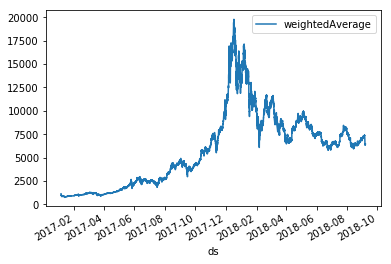

In [52]:
df.plot(x='ds', y ='weightedAverage')

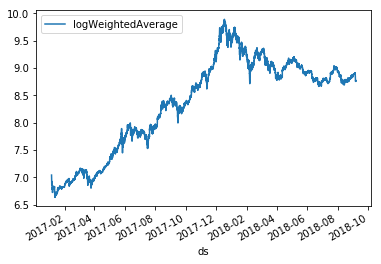

In [53]:
df.plot(x='ds', y ='logWeightedAverage')

Standard bitcoin historical price graph.

In [54]:
from scipy.stats import describe
print('linear stats ' + str(describe(df['weightedAverage'])))
print('log stats ' + str(describe(df['logWeightedAverage'])))

linear stats DescribeResult(nobs=14630, minmax=(759.20800695, 19781.95031876), mean=5817.879262631431, variance=15933324.549354764, skewness=0.7209202151684123, kurtosis=0.14569524622692143)
log stats DescribeResult(nobs=14630, minmax=(6.6322757938022745, 9.892525200859973), mean=8.365736201416059, variance=0.7274629280016174, skewness=-0.4789437194798228, kurtosis=-1.0121566485837672)


|   |linear   |log   |
|---|---|---|
|mean   |5817.83662477842   |8.365708530321312   |
|variance   |15934387.18504999   |0.7275014560523686   |
|skewness   |0.7209291658182619   |-0.4788483915373271   |
|kurtosis   |0.14552149255314006   |-1.0122969215008524   |

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/Users/robert/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


Linear Graphs


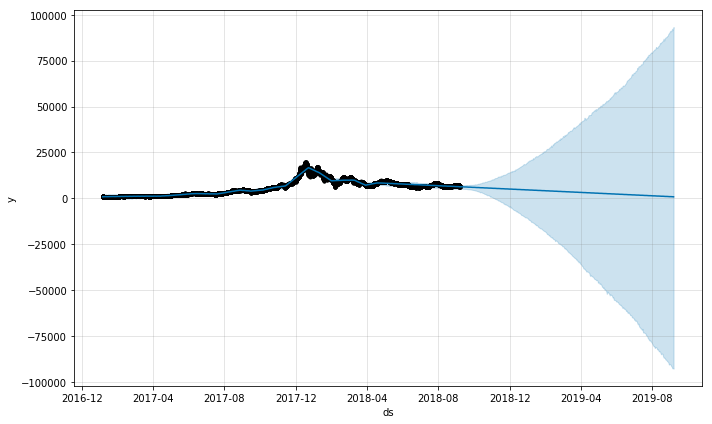

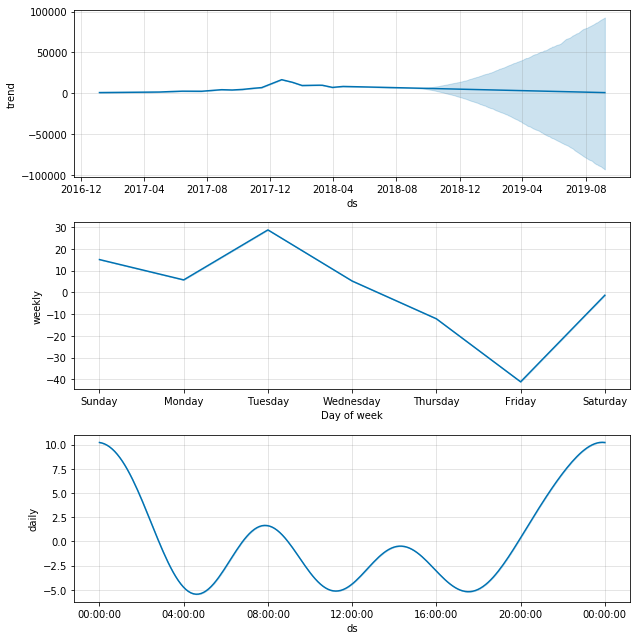

In [55]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
print("Linear Graphs")
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)


Day of week graph makes sense. Price always seems to top out on Sundays while the bears win out over the week.

The daily graph shows how there are multiple regions trading Bitcoin (makes sense) given the multiple local maxima. Midnight GMT corresponds with 5pm LA time, 8am GMT is 5pm Tokyo time, 15 GMT is afternoon in Europe, corresponding with the 3 primary trading regions (USA, SK/JP/AUS, EUR), all with their own local max.

There's obviously a wide range of future price predictions given the historical volatility of Bitcoin.

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/Users/robert/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


Log Graphs


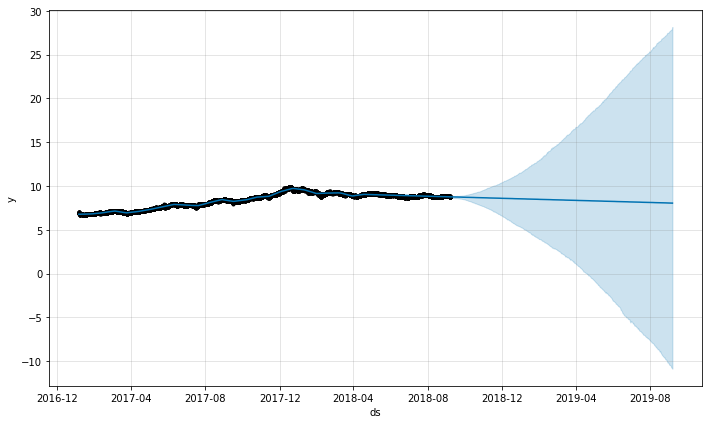

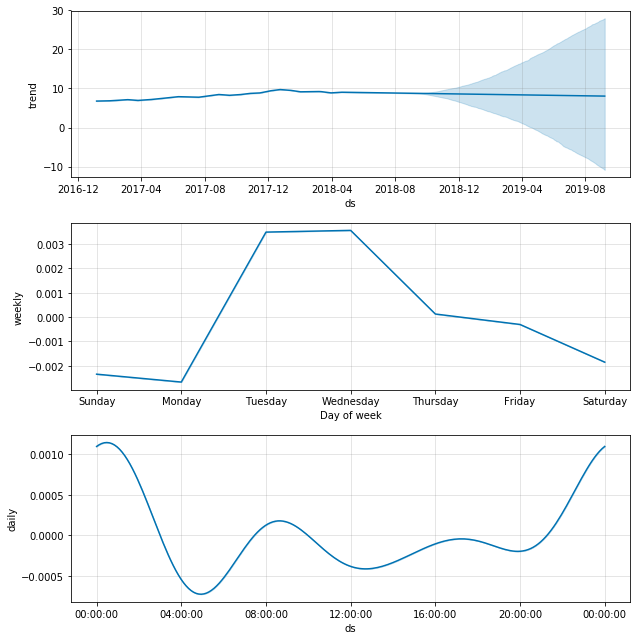

In [57]:
df['y'] = df['logWeightedAverage']
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
print("Log Graphs")
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)